In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
from sklearn import svm
import plotData as pd
import visualizeBoundary as vb
import gaussianKernel as gk

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(X, y):
    plt.figure()

    # ===================== Your Code Here =====================
    # Instructions : Plot the positive and negative examples on a
    #                2D plot, using the marker="+" for the positive
    #                examples and marker="o" for the negative examples
    #
    
    for n, m, c in zip([0, 1], ['o', '+'], ['y', 'black']):
        plt.scatter(*X[np.where(y==n)].T, marker=m, color=c)
        

In [3]:
plt.ion()
np.set_printoptions(formatter={'float': '{: 0.6f}'.format})

# ===================== Part 1: Loading and Visualizing Data =====================
# We start the exercise by first loading and visualizing the dataset.
# The following code will load the dataset into your environment and
# plot the data

print('Loading and Visualizing data ... ')
# Load from ex6data1:
data = scio.loadmat('ex6data1.mat')
X = data['X']
y = data['y'].flatten()
m = y.size

Loading and Visualizing data ... 


Text(0.5, 1.0, 'Figure 1: Example Dataset 1')

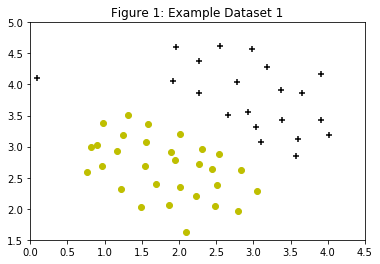

In [4]:

# Plot training data
plot_data(X, y)
plt.ylim([1.5, 5])
plt.xlim([0, 4.5])
plt.title('Figure 1: Example Dataset 1')

Training Linear SVM


/Users/dream/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


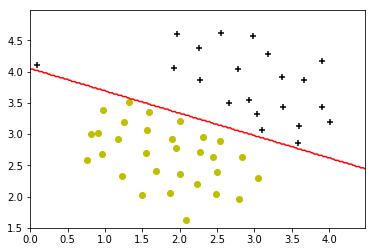

In [5]:
# ===================== Part 2: Training Linear SVM =====================
# The following code will train a linear SVM on the dataset and plot the
# decision boundary learned
#

print('Training Linear SVM')


# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)

c = 1000
clf = svm.SVC(c, kernel='linear', tol=1e-3)
clf.fit(X, y)

plot_data(X, y)
vb.visualize_boundary(clf, X, 0, 4.5, 1.5, 5)

In [6]:
import numpy as np


def gaussian_kernel(x1, x2, sigma):
    x1 = x1.flatten()
    x2 = x2.flatten()

    sim = 0

    # ===================== Your Code Here =====================
    # Instructions : Fill in this function to return the similarity between x1
    #                and x2 computed using a Gaussian kernel with bandwith sigma
    #


    # ==========================================================
    
    sim = np.exp(-1 * np.sum(np.square(x1 - x2)) / (2 * np.square(sigma)))
    return sim


In [7]:
# ===================== Part 3: Implementing Gaussian Kernel =====================
# You will now implement the Gaussian kernel to use
# with the SVM. You should now complete the code in gaussianKernel.py
#

print('Evaluating the Gaussian Kernel')

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussian_kernel(x1, x2, sigma)

print('Gaussian kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = {} : {:0.6f}\n'
      '(for sigma = 2, this value should be about 0.324652'.format(sigma, sim))

Evaluating the Gaussian Kernel
Gaussian kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2 : 0.324652
(for sigma = 2, this value should be about 0.324652


Loading and Visualizing Data ...


Text(0.5, 1.0, 'Figure 4: Example Dataset 2')

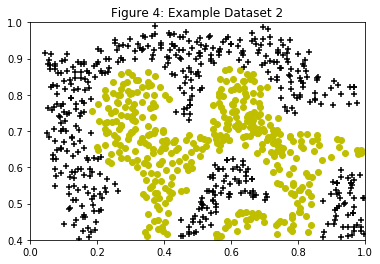

In [8]:

# ===================== Part 4: Visualizing Dataset 2 =====================
# The following code will load the next dataset into your environment and
# plot the data
#

print('Loading and Visualizing Data ...')

# Load from ex6data1:
data = scio.loadmat('ex6data2.mat')
X = data['X']
y = data['y'].flatten()
m = y.size

# Plot training data
plot_data(X, y)
plt.ylim([0.4, 1])
plt.xlim([0, 1])
plt.title('Figure 4: Example Dataset 2')

In [9]:
# ===================== Part 5: Training SVM with RBF Kernel (Dataset 2) =====================
# After you have implemented the kernel, we can now use it to train the
# SVM classifier
#
print('Training SVM with RFB(Gaussian) Kernel (this may take 1 to 2 minutes) ...')

c = 1
sigma = 0.1


def gaussian_kernel(x_1, x_2):
    n1 = x_1.shape[0]
    n2 = x_2.shape[0]
    result = np.zeros((n1, n2))

    for i in range(n1):
        for j in range(n2):
            result[i, j] = gaussian_kernel(x_1[i], x_2[j], sigma)

    return result


Training SVM with RFB(Gaussian) Kernel (this may take 1 to 2 minutes) ...


In [10]:
# clf = svm.SVC(c, kernel=gaussian_kernel)
clf = svm.SVC(c, kernel='rbf', gamma=np.power(sigma, -2))
clf.fit(X, y)

print('Training complete!')

Training complete!


/Users/dream/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


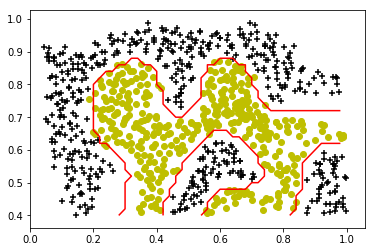

In [11]:
plot_data(X, y)
vb.visualize_boundary(clf, X, 0, 1, .4, 1.0)

Loading and Visualizing Data ...


Text(0.5, 1.0, 'Figure 6: Example Dataset 3')

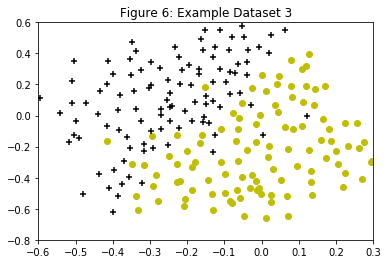

In [12]:

# ===================== Part 6: Visualizing Dataset 3 =====================
# The following code will load the next dataset into your environment and
# plot the data
#

print('Loading and Visualizing Data ...')

# Load from ex6data3:
data = scio.loadmat('ex6data3.mat')
X = data['X']
y = data['y'].flatten()
m = y.size

# Plot training data
plot_data(X, y)
plt.ylim([-0.8, 0.6])
plt.xlim([-0.6, 0.3])
plt.title('Figure 6: Example Dataset 3')

/Users/dream/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


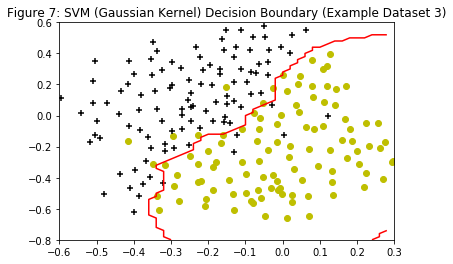

In [13]:

# ===================== Part 7: Visualizing Dataset 3 =====================

clf = svm.SVC(c, kernel='rbf', gamma=np.power(sigma, -2))
clf.fit(X, y)

plot_data(X, y)
plt.ylim([-0.8, 0.6])
plt.xlim([-0.6, 0.3])
plt.title('Figure 7: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)')
vb.visualize_boundary(clf, X, -.5, .3, -.8, .6)
